### 🌳결정 트리(Decision Tree)
##### 그림 출처: 코딩하는 수학쌤, 스팟
- 매우 쉽고 유연하게 적용될 수 있는 알고리즘으로서 데이터의 스케일링, 정규화 등의 데이터 전처리의 의존도가 매우 적다.
- 학습을 통해 데이터에 있는 규칙을 자동으로 찾아내어 Tree 기반의 분류 규칙을 만든다.
- if-else 기반의 규칙을 사용하기 때문에 분류의 기준을 정하는 것이 알고리즘 성능에 많은 영향을 미친다.
- 영향을 가장 많이 미치는 feature를 찾아낼 수도 있다.
- 👎예측 성능을 향상시키기 위해서는 복잡한 규칙 구조를 가져야 하기 때문에 과적합(Overfitting)이 발생해서 예측 성능이 저하될 수도 있다.  
  따라서 트리의 크기를 사전에 제한하는 튜닝을 필요로 한다.
<img src="./images/decision_tree01.jpg" width="450" style="margin-top:20px; margin-bottom:20px; margin-left: -30px">  
- 가장 상위 노드를 "루트 노드"라고 하며, 나머지 분기점을 "서브 노드", 결정된 분류값 노드를 "리프 노드"라고 한다.
<img src="./images/decision_tree02.png" width="450" style="margin-top:20px; margin-bottom:20px; margin-left: -30px">  
- 복잡도를 감소시키는 것이 주목적이며, 정보의 복잡도를 불순도(Impurity)라고 하며, 이를 수치화한 값으로는 지니 계수(Gini coefiicient), 엔트로피(Entropy)가 있다.  
- 1. 클래스가 섞이지 않고 분류가 잘 되었다면, 불순도가 낮다. 
- 2. 클래스가 섞여 있고, 분류가 잘 안되었다면, 불순도가 높다.
<img src="./images/impurity.png" width="350" style="margin-top:20px; margin-left: -30px">

> ##### Gini coefiicient [지니 코우어피션트]  
<img src="./images/gini01.png" width="160" style="margin-left: -10px">
> - 빨간 공 6개와 파란공 4개일 경우 G = 0.48
<img src="./images/gini02.png" width="280" style="margin-left: -10px">  

> - 통계적 분산 정도를 정량화하여 표현한 값이고, 0과 1사이의 값을 가진다.
> - 지니 계수가 낮을 수록 분류가 잘 된 것이다.
> - Decision Tree Model  
> CART (Classification and Regression Tree): 단 두개의 노드(Binary Tree)

---
> ##### Entropy
<img src="./images/entropy01.png" width="200" style="margin-left: 0">
> - 빨간 공 6개와 파란공 4개일 경우 E = 0.97
<img src="./images/entropy02.png" width="250" style="margin-left: 0">
<img src="./images/entropy03.png" width="500" style="margin-left: 0">  

> - 확률분포가 가지는 정보의 확신도 혹은 정보량(정보의 양)을 수치로 표현한 것이다.
> - 엔트로피 값이 작을 수록 분류가 잘 된 것이다.
> - Decision Tree Model  
> ID3(Iterative Dichotomiser 3): 모든 독립변수가 범주형 데이터인 경우만 사용 가능  
C4.5 (ID3 알고리즘의 결점을 보완): 여러 개의 자식 노드  
> 📌범주형 데이터: 'A', 'B', 'C'와 같이 종류를 표시하는 데이터(카테고리 데이터)

---
> ##### Misclassification Rate
> - 잘못 예측된 관측치의 백분율


##### 📌과적합(Overfitting)
- 학습 데이터를 과하게 잘 학습시켜서 오차가 오히려 증가하는 현상이다.
- 예를 들어, 빨간색 사과의 feature를 과하게 학습시키면, 초록색 사과를 사과로 인식하지 못하게 된다.
<img src="./images/overfitting.png" width="350" style="margin-left: -30px">
- 학습 데이터에 대해서는 오차가 감소하지만, 실제 데이터에 대해서는 오차가 증가한다.

### Graphviz
- 결정트리 모델을 시각화할 수 있다.
- https://graphviz.org/download/, graphviz-9.0.0 (64-bit) EXE installer [sha256]
- https://drive.google.com/file/d/1oCXidIjNAvUT2UcNFEdhRfFhnZ96iHrp/view?usp=sharing

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# DecisionTreeClassifier 생성
decision_tree_classifier = DecisionTreeClassifier(random_state=124)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris = load_iris()

X_train, X_test, y_train, y_test = \
train_test_split(iris.data, iris.target, test_size=0.2, random_state=13)

# DecisionTreeClassifier 학습
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=124)

In [2]:
from sklearn.tree import export_graphviz

# export_graphviz()의 out_file로 지정된 iris_tree01.dot 파일을 생성
export_graphviz(decision_tree_classifier
                , out_file="./images/iris_tree01.dot"
                , class_names=iris.target_names
                , feature_names=iris.feature_names
                , impurity=True
                , filled=True)

In [3]:
import graphviz

with open("./images/iris_tree01.dot") as f:
    dot_graph = f.read()

iris_tree01_graph = graphviz.Source(dot_graph)

In [4]:
iris_tree01_graph.render(filename="iris_tree01", directory='./images', format="png")

'images/iris_tree01.png'

<img src="./images/iris_tree01.png" width=800 style="margin-left:0">

### feature별 중요도
각 feature가 분류를 나누는 데에 얼마나 영향을 미쳤는지를 표기하는 척도이다.
##### feature_importances_
- 분류를 결정하는 데에 가장 중요도가 높았던 feature를 리턴한다.

In [5]:
for i in zip([1,2,3], [9,8,7]):
    print(i)

(1, 9)
(2, 8)
(3, 7)


In [6]:
for name, value in zip(iris.feature_names, decision_tree_classifier.feature_importances_):
    print(f'{name}, {round(value, 4)}')

sepal length (cm), 0.0
sepal width (cm), 0.025
petal length (cm), 0.5872
petal width (cm), 0.3877


<Axes: >

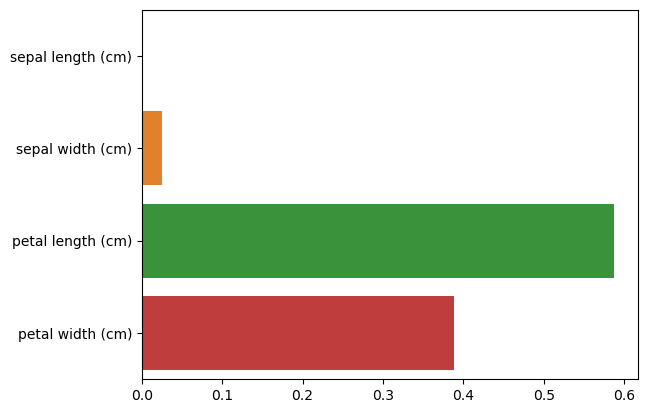

In [7]:
import seaborn as sns

sns.barplot(x=decision_tree_classifier.feature_importances_, y=iris.feature_names)

### 결정 트리의 과적합
- 위에서 알아낸 것처럼 petal length, petal width, 2개의 feature만으로도 분류가 가능하기 때문에, 2차원 산점도(분포도)를 통해 시각화할 수 있다.
- 마지막까지 노드가 분리되었기 때문에 과적합이 발생했을 가능성이 있고, 이를 하이퍼 파라미터 튜닝을 통해 해결할 수 있다.  
📌하이퍼 파라미터란, 최적의 훈련 모델을 구현하기 위해 알고리즘의 수치를 조정할 수 있는 변수를 의미한다.

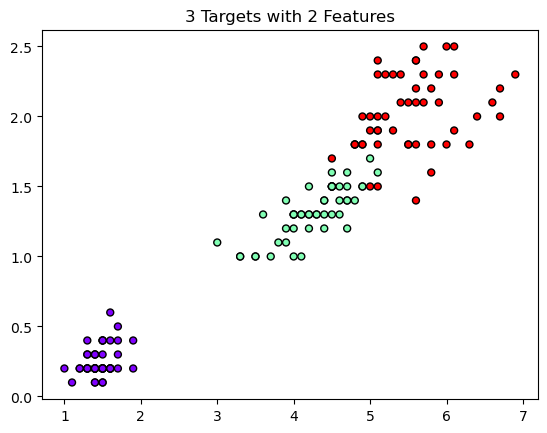

In [8]:
import matplotlib.pyplot as plt

features, targets = iris.data, iris.target

plt.title("3 Targets with 2 Features")
plt.scatter(features[:, 2], features[:, 3], marker='o', c=targets, s=25, cmap="rainbow", edgecolors='k')

In [9]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

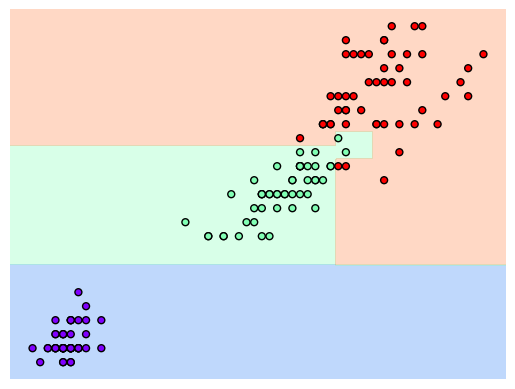

In [10]:
from sklearn.tree import DecisionTreeClassifier

features, targets = iris.data[:, [2, 3]], iris.target

decision_tree_classifier = DecisionTreeClassifier(random_state=124).fit(features, targets)
visualize_boundary(decision_tree_classifier, features, targets)

##### 최소 smaples의 개수를 6개로 제한한다.

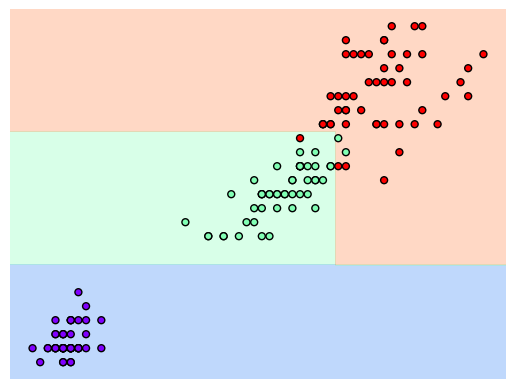

In [11]:
from sklearn.tree import DecisionTreeClassifier

features, targets = iris.data[:, [2, 3]], iris.target

decision_tree_classifier = DecisionTreeClassifier(random_state=124, min_samples_leaf=6).fit(features, targets)
visualize_boundary(decision_tree_classifier, features, targets)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# DecisionTreeClassifier 생성
decision_tree_classifier = DecisionTreeClassifier(random_state=124, min_samples_leaf=6)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris = load_iris()

X_train, X_test, y_train, y_test = \
train_test_split(iris.data, iris.target, test_size=0.2, random_state=13)

# DecisionTreeClassifier 학습
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=6, random_state=124)

In [13]:
from sklearn.tree import export_graphviz

# export_graphviz()의 out_file로 지정된 iris_tree02.dot 파일을 생성
export_graphviz(decision_tree_classifier
                , out_file="./images/iris_tree02.dot"
                , class_names=iris.target_names
                , feature_names=iris.feature_names
                , impurity=True
                , filled=True)

In [14]:
import graphviz

with open("./images/iris_tree02.dot") as f:
    dot_graph = f.read()

iris_tree01_graph = graphviz.Source(dot_graph)

In [15]:
iris_tree01_graph.render(filename="iris_tree02", directory='./images', format="png")

'images/iris_tree02.png'

<img src="./images/iris_tree02.png" width=800 style="margin-left:0">

##### make_classification()
- 분류용 가상 데이터를 생성한다.
- n_features : 독립 변수의 수, 디폴트 20
- n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2
- n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
- n_clusters_per_class : 클래스 당 클러스터의 수, 디폴트 2

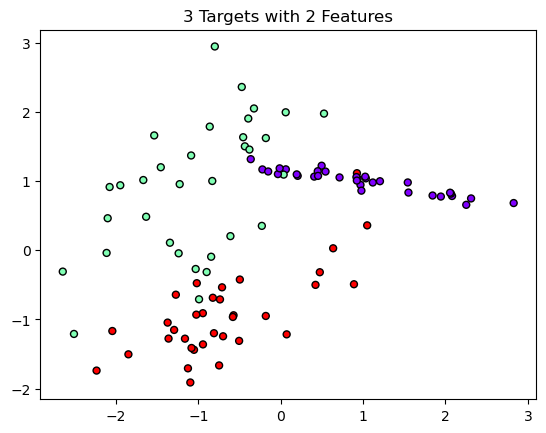

In [16]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title("3 Targets with 2 Features")

# 2차원 시각화를 위해서 feature는 2개, target은 3가지 유형의 classification 샘플 데이터 생성.
X_features, y_targets = make_classification(n_features=2, n_redundant=0, n_classes=3, n_clusters_per_class=1, random_state=124)

plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_targets, s=25, cmap="rainbow", edgecolors='k')

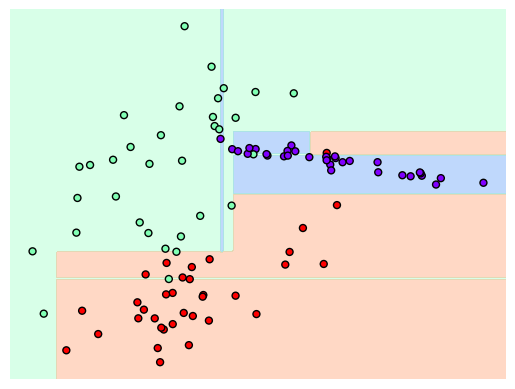

In [17]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier(random_state=124).fit(X_features, y_targets)
visualize_boundary(decision_tree_classifier, X_features, y_targets)

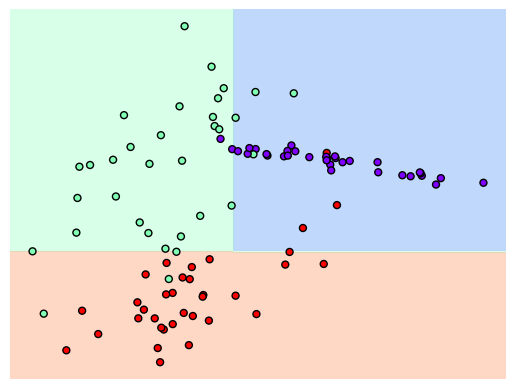

In [18]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier(random_state=124, min_samples_leaf=6).fit(X_features, y_targets)
visualize_boundary(decision_tree_classifier, X_features, y_targets)